    YEAR        HGT         WGT     WNGSPN    SPRINT
0   2000  77.371094  214.078125  80.937500  3.321930
1   2001  78.441558  220.415584  83.243506  3.286053
2   2002  77.654321  217.074074  81.959877  3.270417
3   2003  78.307692  224.179487  82.836538  3.262535
4   2004  77.557692  217.974026  82.384615  3.265000
5   2005  77.481013  215.986076  82.405063  3.290845
6   2006  77.379333  220.666667  82.443333  3.327867
7   2007  77.440789  214.894737  82.269737  3.332027
8   2008  77.305921  217.102632  82.470395  3.226324
9   2009  77.034091  213.431818  81.414773  3.245000
10  2010  78.456731  224.594231  83.576923  3.321111
11  2011  77.287037  214.955556  81.900000  3.228679
12  2012  77.983333  219.898333  82.683333  3.359074
13  2013  77.471774  209.659677  82.087302  3.327308
14  2014  77.191964  212.528571  82.223214  3.303750
15  2015  77.293103  213.482759  82.698276  3.299318
16  2016  78.000000  212.520833  83.010204  3.304324
17  2017  77.700000  214.983333  82.766667  3.

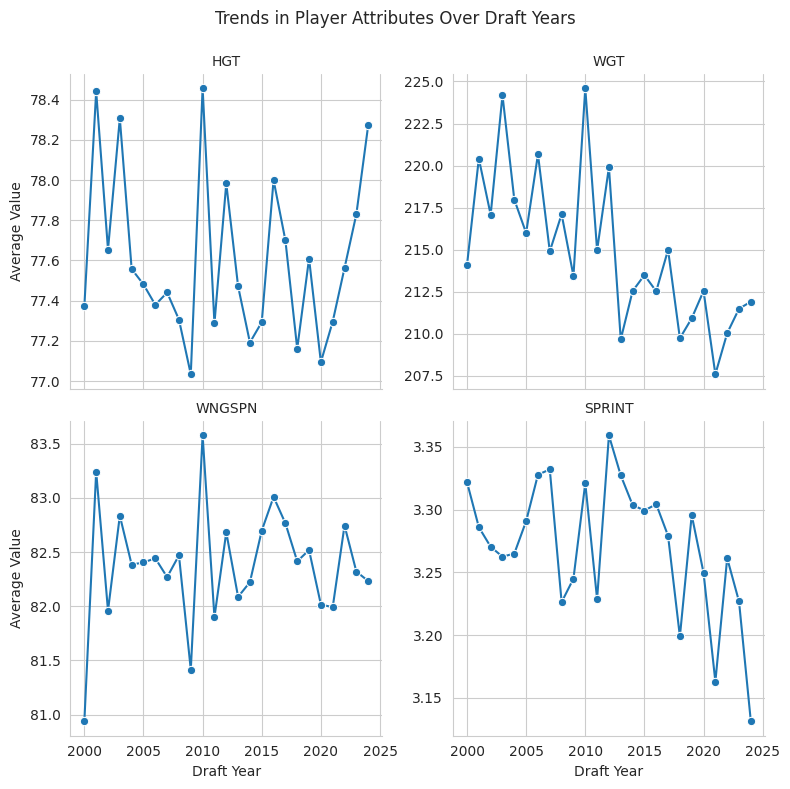

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv("draft_combine.csv")

# Convert relevant columns to numeric, handling errors
columns_to_convert = ["HGT", "WGT", "WNGSPN", "SPRINT"]
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Group by draft year and calculate average metrics
query_result = df.groupby("YEAR")[columns_to_convert].mean().reset_index()
print(query_result)

# Set style for the plots
sns.set_style("whitegrid")

# FacetGrid for individual trends
g = sns.FacetGrid(query_result.melt(id_vars="YEAR"), col="variable", col_wrap=2, height=4, sharex=True, sharey=False)
g.map(sns.lineplot, "YEAR", "value", marker="o")
g.set_titles("{col_name}")
g.set_axis_labels("Draft Year", "Average Value")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Trends in Player Attributes Over Draft Years")

# Show the plots
plt.show()